# Tsunami data analysis

**In this notebook ill present a detailed analysis of NOAA Tsunami dataset and use Plotly package for dynamic visualizations. 
You can put the mouse on the plot figure's to gain information about the data.  
<br>**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import plotly.express as px
import re
import plotly.graph_objects as go
import seaborn as sns

from plotly.subplots import make_subplots


In [37]:
df = pd.read_csv('./data/tsunamis.csv')
df.head()

,Sr.no,Year,Mo,Dy,Hr,Mn,Sec,TsunamiNanEventNanValidity,TsunamiNanCauseNanCode,EarthquakeNanMagnitude,...,TotalNanMissing,TotalNanMissingNanDescription,TotalNanInjuries,TotalNanInjuriesNanDescription,TotalNanDamageNan($Mil),TotalNanDamageNanDescription,TotalNanHousesNanDestroyed,TotalNanHousesNanDestroyedNanDescription,TotalNanHousesNanDamaged,TotalNanHousesNanDamagedNanDescription
0,1,1900,1.0,10.0,NaN,NaN,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1900,8.0,11.0,4.0,40.0,NaN,4,3,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,3,1900,9.0,10.0,21.0,30.0,NaN,4,1,6.8,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0
3,4,1900,9.0,17.0,21.0,45.0,NaN,3,1,7.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1900,10.0,7.0,21.0,4.0,NaN,3,1,6.9,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sr.no                                     1443 non-null   int64  
 1   Year                                      1443 non-null   int64  
 2   Mo                                        1431 non-null   float64
 3   Dy                                        1409 non-null   float64
 4   Hr                                        1132 non-null   float64
 5   Mn                                        1119 non-null   float64
 6   Sec                                       964 non-null    float64
 7   TsunamiNanEventNanValidity                1443 non-null   int64  
 8   TsunamiNanCauseNanCode                    1443 non-null   int64  
 9   EarthquakeNanMagnitude                    1057 non-null   float64
 10  Vol                                 

<br>**Lets Replace all Nan substring in columns name with _ and space in Country column**  
<br>

In [11]:
pattern = re.compile(r'Nan')
res = [pattern.sub('_', sub) for sub in df.columns]
res2 = [pattern.sub(' ', sub) for sub in df.Country]
df.columns=res
df.Country=res2

<br>**There are many interesting columns in this dataset, for this project i choose the following columns:**  
<br>

In [12]:
df.columns

Index(['Sr.no', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec',
       'Tsunami_Event_Validity', 'Tsunami_Cause_Code', 'Earthquake_Magnitude',
       'Vol', 'More_Info', 'Deposits', 'Country', 'Location_Name', 'Latitude',
       'Longitude', 'Maximum_Water_Height_(m)', 'Number_of_Runups',
       'Tsunami_Magnitude_(Abe)', 'Tsunami_Magnitude_(Iida)',
       'Tsunami_Intensity', 'Deaths', 'Death_Description', 'Missing',
       'Missing_Description', 'Injuries', 'Injuries_Description',
       'Damage_($Mil)', 'Damage_Description', 'Houses_Destroyed',
       'Houses_Destroyed_Description', 'Houses_Damaged',
       'Houses_Damaged_Description', 'Total_Deaths', 'Total_Death_Description',
       'Total_Missing', 'Total_Missing_Description', 'Total_Injuries',
       'Total_Injuries_Description', 'Total_Damage_($Mil)',
       'Total_Damage_Description', 'Total_Houses_Destroyed',
       'Total_Houses_Destroyed_Description', 'Total_Houses_Damaged',
       'Total_Houses_Damaged_Description'],
      dtype='

In [13]:
df=df[['Sr.no','Year','Mo','Dy','Tsunami_Cause_Code','Tsunami_Event_Validity','Earthquake_Magnitude','Country','Latitude','Longitude','Deaths']]

The meaning of Tsunami cause code :<br>
1 Earthquake<br>
2 Questionable Earthquake<br>
3 Earthquake and Landslide<br>
4 Volcano and Earthquake<br>
5 Volcano, Earthquake, and Landslide<br>
6 Volcano<br>
7 Volcano and Landslide<br>
8 Landslide<br>
9 Meteorological<br>
10 Explosion<br>

In [14]:
data=[[1,'Earthquake'],[2,'Questionable Earthquake'],[3,'Earthquake and Landslide'],[4,'Volcano and Earthquake']
     ,[5,'Volcano, Earthquake, and Landslide'],[6,'Volcano'],[7,'Volcano and Landslide'],[8,'Landslide'],
      [9,'Meteorological'],[10,'Explosion']]
df_for_merge = pd.DataFrame(data, columns=['Tsunami_Cause_Code','Cause']) 
df=df.merge(df_for_merge,how='inner',on='Tsunami_Cause_Code')

In [15]:
# code_to_cause_map = {1: "e", 2: "qe"}

# df['Cause'] = df.apply(lambda row: code_to_cause_map[row['Tsunami_Cause_Code']], axis=1)

In [16]:
df.describe()

,Sr.no,Year,Mo,Dy,Tsunami_Cause_Code,Tsunami_Event_Validity,Earthquake_Magnitude,Latitude,Longitude,Deaths
count,1369.000000,1369.000000,1363.000000,1351.000000,1369.000000,1369.000000,1053.000000,1293.000000,1293.000000,158.000000
mean,737.638422,1964.653762,6.597212,15.613620,2.306793,2.906501,7.018898,14.278903,42.539183,1893.930380
std,414.700582,37.135124,3.461756,8.619457,2.595141,1.447935,0.768296,28.856351,113.912522,18185.777671
min,1.000000,1900.000000,1.000000,1.000000,1.000000,-1.000000,3.700000,-63.000000,-179.971000,1.000000
25%,387.000000,1931.000000,4.000000,8.000000,1.000000,2.000000,6.600000,-8.337000,-71.417000,2.000000
50%,745.000000,1966.000000,7.000000,16.000000,1.000000,4.000000,7.100000,16.029000,101.000000,10.000000
75%,1097.000000,1998.000000,10.000000,23.000000,1.000000,4.000000,7.600000,38.650000,142.214000,127.000000
max,1443.000000,2023.000000,12.000000,31.000000,10.000000,4.000000,9.500000,78.370000,179.984000,227899.000000


In [17]:
# df.columns

In [18]:
df.isna().sum()

Sr.no                        0
Year                         0
Mo                           6
Dy                          18
Tsunami_Cause_Code           0
Tsunami_Event_Validity       0
Earthquake_Magnitude       316
Country                      0
Latitude                    76
Longitude                   76
Deaths                    1211
Cause                        0
dtype: int64

In [19]:
df['Deaths'].value_counts(ascending=False)

1.0       29
2.0       12
5.0        8
3.0        8
4.0        7
          ..
81.0       1
23.0       1
110.0      1
155.0      1
1239.0     1
Name: Deaths, Length: 73, dtype: int64

In [20]:
df['Cause'].value_counts(ascending=False)

Earthquake                            1043
Landslide                               94
Earthquake and Landslide                70
Meteorological                          70
Volcano                                 67
Volcano and Landslide                   10
Questionable Earthquake                  8
Volcano and Earthquake                   5
Explosion                                1
Volcano, Earthquake, and Landslide       1
Name: Cause, dtype: int64

<br>**A significant portion of the missing values exists within the "Death" and "Earthquake_Magnitude" columns.<br> It appears that in the case of the "Death" column, these missing values may arise either from a death count of 0 or from historical tsunamis where data precision is lacking.<br> As for the "Earthquake_Magnitude" column, it's worth noting that not all tsunamis are triggered by earthquakes, which could explain the presence of missing data in this particular column.**  
<br>

In [21]:
df['Deaths']=df['Deaths'].fillna(0)

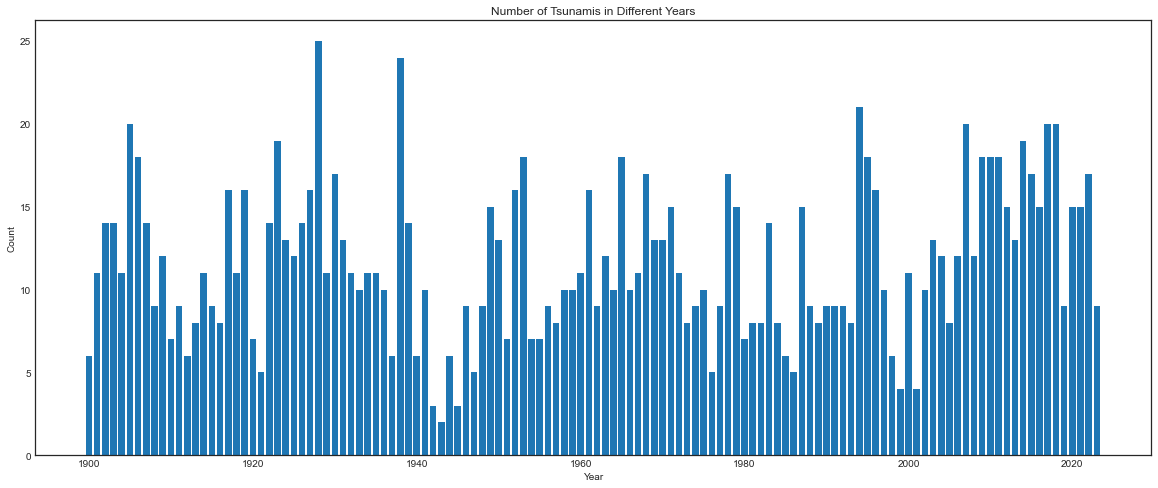

In [50]:
#df_cnt_year=df.groupby(['Year'])['Sr.no'].count().reset_index()
#fig = px.bar(df_cnt_year, x="Year", y="Sr.no",template='plotly_white', labels={
#                     "Sr.no": "Count"},
#             title="<b>Number of Tsunamis in Different Years")
#fig.show()

df_cnt_year = df.groupby(['Year'])['Sr.no'].count().reset_index()
plt.figure(figsize=(20,8))
plt.bar(df_cnt_year['Year'], df_cnt_year['Sr.no'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Tsunamis in Different Years')
plt.show()

**<br>It's evident that There is a noticeable increase in the frequency of tsunami occurrences every 5 to 10 years.  
<br>**

In [23]:
df_cnt_mo=df.groupby(['Mo'])['Sr.no'].count().reset_index()
fig=px.line(df_cnt_mo, x="Mo", y="Sr.no",template='plotly_white',labels={
                     "Sr.no": "Count","Mo":"Month"},title="<b>Number of Tsunamis in Different Months")
fig.show()

**<br>Based on the graph presented, it appears that there is a minor variation in frequency by month, but the differences observed are not particularly significant.**  
<br>

In [24]:
df_Deaths_year=df.groupby(['Year'])['Deaths'].sum().reset_index()
df_Deaths_year.sort_values(by=['Deaths'])

,Year,Deaths
61,1961,0.0
85,1985,0.0
24,1924,0.0
25,1925,0.0
84,1984,0.0
...,...,...
118,2018,4778.0
76,1976,6800.0
52,1952,10034.0
111,2011,18428.0


In 2004, there was an unusually high number of fatalities due to the tsunami in Indonesia. Let's create a graph without that particular data point.

In [25]:
df_Deaths_year=df.loc[(df['Deaths']<200000)].groupby(['Year'])['Deaths'].sum().reset_index()
df_Deaths_year.sort_values(by=['Deaths'])

#do log scale with -inf as 0

,Year,Deaths
61,1961,0.0
86,1986,0.0
24,1924,0.0
25,1925,0.0
85,1985,0.0
...,...,...
46,1946,3395.0
118,2018,4778.0
76,1976,6800.0
52,1952,10034.0


In [26]:
fig = px.line(df_Deaths_year, x="Year", y="Deaths",template='plotly_white',title="<b>Deaths Count in Different Years")
fig.show()

<br>**From the plot above, it's apparent that fatal tsunamis occur at intervals of several years.**  
<br>

In [27]:
df.sort_values(['Deaths'],ascending = False)[['Year','Deaths','Country']].head(10)

,Year,Deaths,Country
821,2004,227899.0,INDONESIA
890,2011,18428.0,JAPAN
395,1952,10000.0,RUSSIA
600,1976,6800.0,PHILIPPINES
1111,2018,4340.0,INDONESIA
261,1933,3022.0,JAPAN
449,1960,2226.0,CHILE
57,1907,2188.0,INDONESIA
171,1923,2144.0,JAPAN
1049,1908,2000.0,ITALY


In [28]:

def cat_Deaths(Deaths):
    if Deaths < 100:
        return 'Less than 100'
    elif Deaths >= 100 and Deaths < 500:
        return 'Between 500 and 100'
    elif Deaths >= 500 and Deaths < 1000:
        return 'Between 1000 and 500'
    else:
        return 'Over 1000'

# Apply the function to the Age column using the apply() function
df['Deaths_grp'] = df['Deaths'].apply(cat_Deaths)

In [29]:
data_cnt_Country=df.groupby(['Country','Deaths_grp'])['Sr.no'].count().sort_values(ascending=False).reset_index()
data_cnt_Country=data_cnt_Country.loc[data_cnt_Country['Country'].isin(df.groupby(['Country'])['Sr.no'].count().reset_index().nlargest(20,'Sr.no')['Country'])]

fig=px.bar(data_cnt_Country,x="Country",y='Sr.no',color='Deaths_grp',template='plotly_white'
          ,labels={"Sr.no": "Count","Deaths_grp":"Number of Deaths"},title="<b>Number of Tsunamis By Country")
fig.show()

<br>**It's evident that the majority of tsunamis resulted in fewer than 100 fatalities.   
Notably, Japan, USA, Indonesia, Chile and Russia experienced the highest number of tsunami events.**    
<br>  

In [30]:
df[df.Deaths<100]['Deaths'].value_counts(ascending=False)

0.0     1211
1.0       29
2.0       12
5.0        8
3.0        8
4.0        7
10.0       5
50.0       4
9.0        4
8.0        3
26.0       3
7.0        3
12.0       2
75.0       2
27.0       2
6.0        2
61.0       1
43.0       1
15.0       1
20.0       1
11.0       1
28.0       1
41.0       1
54.0       1
66.0       1
81.0       1
52.0       1
13.0       1
71.0       1
33.0       1
16.0       1
17.0       1
18.0       1
23.0       1
57.0       1
73.0       1
Name: Deaths, dtype: int64

<br>**The majority of tsunamis in the category of less than 100 deaths resulted in no fatalities. Let's now examine the tsunamis that caused at least one death.**  
<br>

In [31]:
data_cnt_Country=df[df.Deaths>0].groupby(['Country','Deaths_grp'])['Sr.no'].count().sort_values(ascending=False).reset_index()
data_cnt_Country=data_cnt_Country.loc[data_cnt_Country['Country'].isin(df.groupby(['Country'])['Sr.no'].count().reset_index().nlargest(20,'Sr.no')['Country'])]
fig=px.bar(data_cnt_Country,x="Country",y='Sr.no',color='Deaths_grp',template='plotly_white'
          ,labels={"Sr.no": "Count","Deaths_grp":"Number of Deaths"},title="<b>Number of Tsunamis That Caused Death By Country")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

#sort legned

**<br>The top five countries with tsunamis causing at least one fatality are Indonesia, the USA, Japan, the Philippines, and Chile. Notably, the USA has not experienced any tsunamis resulting in more than 500 fatalities, but it has the highest number of tsunamis causing fewer than 100 deaths. Both Japan and Indonesia have encountered five fatal tsunami incidents, each of which led to over 1,000 deaths.**      

**Additionally, Italy is noteworthy, having encountered three tsunami incidents, with two of them resulting in over 1,000 fatalities.**  
<br>

### Tsunami Cause

In [32]:
data_cnt_cause=df.groupby(['Cause'])['Sr.no'].count().sort_values(ascending=False).reset_index()
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(go.Pie(
    name = "",
    values = data_cnt_cause['Sr.no'],
    labels = data_cnt_cause['Cause'],
    hovertemplate = "Cause:%{label} <br> Number of Tsunamis: %{value}",

))
fig.update_traces(textfont_size=15,    title="<b>Tsunami Cause Count<br><br>          ",
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.show()

<br>**The majority of tsunamis are triggered by factors such as earthquakes, landslides, meteorological events, and volcanoes, with earthquakes being the most common cause.**   
<br>

In [33]:
colors=['gold', 'mediumturquoise', 'darkorange', 'lightgreen','blue']
fig = px.box(df[(df.Deaths>0) & (df.Cause.isin(['Earthquake','Landslide','Earthquake and Landslide','Meteorological','Volcano']))], 
             x="Cause", y="Deaths", points="all",log_y=True,color='Cause',template='plotly_white',color_discrete_sequence=colors,title="<b>Tsunami Death By Different Cause")
fig.show()

<br>**In addition to being the most common cause, earthquakes also tend to generate the most dangerous tsunamis. Landslides are another significant trigger of powerful tsunamis. Meanwhile, tsunamis resulting from volcanoes and meteorological events have historically caused the least number of fatalities.**  
<br>

In [34]:
fig = px.scatter(df[df.Deaths>0], x="Earthquake_Magnitude", y="Deaths",log_y=True, trendline="ols",
               trendline_options=dict(log_y=True),trendline_color_override="black",template='plotly_white')
fig.show()

<br>**From the plot above, it's evident that there is a positive correlation between the magnitude of the earthquake and the number of deaths caused by the tsunami.**  
<br>

In [35]:
def cat_Deaths_size(Deaths):
    if Deaths < 100:
        return 0.5
    elif Deaths >= 100 and Deaths < 500:
        return 1.5
    elif Deaths >= 500 and Deaths < 1000:
        return 3.5
    else:
        return 6

# Apply the function to the Age column using the apply() function
df['Deaths_grp_size'] = df['Deaths'].apply(cat_Deaths_size)


fig = px.scatter_mapbox(
                        df[(df.Tsunami_Event_Validity<4) & (df.Tsunami_Event_Validity!=-1)],
                        lat='Latitude',
                        lon='Longitude',
                        hover_name='Country',
                        color='Deaths_grp',
                        size='Deaths_grp_size',
                        labels={"Deaths_grp": "Number of Deaths"},
                        hover_data = {'Latitude':False,'Longitude':False,'Deaths_grp_size':False},
                        #color_continuous_scale = px.colors.diverging.Geyser,
                        center=dict(lat=0, lon=210), zoom=0.5,
                        )

fig.update_layout(
                  mapbox_style="carto-positron",
                  width=1000, 
                  height=500,
                  title_text="<b>World Tsunami's locations",
                  title_x=0.5
                 )



fig.show()

* The majority of tsunamis occured around Pacific Ocean and Mediterranean Sea.  
* The most fatal tsunamis occured at the east and southeast of asia.    
* Interestingly, a significant number of tsunamis were recorded in the western part of North America, although most of them did not result in any fatalities.